In [1]:
function = {}

In [2]:
for line in open('/Users/williamharrigan/Desktop/Github/protein-seq-contact-sites/VOGS/tsv/vog.annotations.tsv'):
    data = line.split("\t")
    if not data[0] in function: 
        function[data[0]] = data[3]
    else:
        function[data[0]].add(data[3])    
data   

['VOG35115', '2', '2', 'Xu', 'REFSEQ EsV-1-125\n']

In [4]:
vog_members = {}

In [14]:
#occasionally items cannot be located from dictionary

for line in open('/Users/williamharrigan/Desktop/Github/protein-seq-contact-sites/VOGS/tsv/vog.members.tsv'):
    data = line.split("\t")
    if not data[0] in vog_members: 
        vog_members[data[0]]=[data[4]]
    else:
        vog_members[data[0]]=(data[4])
        
data

['VOG35115', '2', '2', 'Xu', '37665.NP_077610.1,39420.YP_002154705.1\n']

In [6]:
#value = '1269028.AGC01594.1'

def locate_vog(value):
    for k, v in vog_members.items():
        if value in v:
            return k
            
            
        

In [7]:
def vog_function(vogPair):
    for k,v in function.items():
        if vogPair in k:
            return v
        #if i in function:
         #   if "Xs" in (function[i]):
          #      xs_vogs.append(i)
    

In [8]:
vog_comp = set()

In [9]:
for line in open('/Users/williamharrigan/Desktop/Github/protein-seq-contact-sites/VOGS/tsv/same_vog_scores.tsv'):
    data = list(line.split("\t"))
    if (len(data)) == 6:
        seq_pairs = []
        seq_pairs.append(data[2])
        seq_pairs.append(data[3])
        seq_pairs.append(data[0])
        seq_pairs.append(data[5])
        vog_comp.add(tuple(seq_pairs))
        
data

['605',
 '592.7500000000057',
 'YP_009810043.1',
 'YP_009810600.1',
 '719',
 '722\n']

In [10]:
len(data)

6

In [79]:
#vog_comp

In [12]:
located_vog = set()

In [15]:
#must run vog members code directly before
count = 0
 
for i in vog_comp:
    count+=1
    pair = []
    pair.append(locate_vog(str(i[0])))
    pair.append(locate_vog(str(i[1])))
    pair.append(float(i[2]))
    pair.append(float(i[3]))
    pair.append(float(i[2])/float(i[3]))
    pair.append(vog_function(pair[0]))
    located_vog.add(tuple(pair))
    if count==5000:
        break

In [80]:
#located_vog

In [109]:
import matplotlib.pyplot as plt
import numpy as n , pandas as pd

#print(n.array(xs_seqs))
#print(p.DataFrame(xs_seqs))
colnames = ["VOG1","VOG2","Score","Length","Relative Score","Function"]
df = pd.DataFrame(located_vog,columns=colnames)
df = df.replace('\n','', regex=True)


In [53]:
df.head()

,VOG1,VOG2,Score,Length,Relative Score,Function
0,VOG15136,VOG15136,17.0,100.0,0.170000,Xu
1,VOG08148,VOG08148,59.0,60.0,0.983333,Xu
2,VOG00521,VOG00521,5.0,161.0,0.031056,XhXpXrXs
3,VOG03660,VOG00340,29.0,229.0,0.126638,Xu
4,VOG34717,VOG34717,161.0,189.0,0.851852,Xu


In [54]:
df.shape

(4945, 6)

In [55]:
df.describe()

,Score,Length,Relative Score
count,4945.000000,4945.000000,4945.000000
mean,138.367037,234.346815,0.663177
std,144.456914,214.743260,0.311738
min,2.000000,20.000000,0.007949
25%,51.000000,90.000000,0.408840
50%,91.000000,154.000000,0.738220
75%,168.000000,300.000000,0.969925
max,1021.000000,1022.000000,0.999022


In [56]:
df.value_counts()

VOG1      VOG2      Score  Length  Relative Score  Function
VOG00001  VOG00001  18.0   361.0   0.049861        Xh          1
VOG07720  VOG07720  147.0  392.0   0.375000        Xu          1
                    241.0  286.0   0.842657        Xu          1
                    224.0  378.0   0.592593        Xu          1
                           295.0   0.759322        Xu          1
                                                              ..
VOG01712  VOG01712  114.0  175.0   0.651429        Xh          1
VOG01711  VOG01711  57.0   58.0    0.982759        Xu          1
VOG01710  VOG01710  114.0  115.0   0.991304        Xu          1
                    113.0  115.0   0.982609        Xu          1
VOG34969  VOG34969  41.0   68.0    0.602941        Xu          1
Length: 4945, dtype: int64

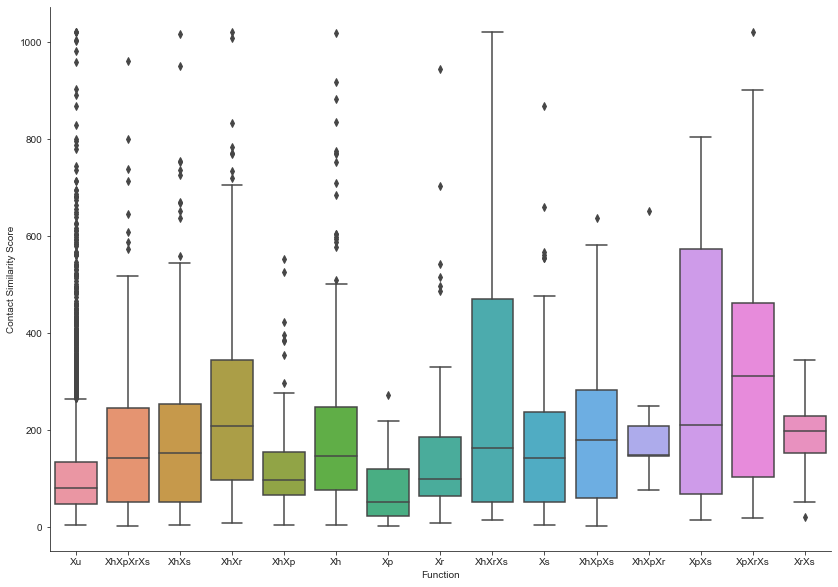

In [95]:
#boxplot describing how function relates to score

import seaborn as sns

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
sns.boxplot(y = "Score", x = "Function", data = df)    
ax.set(xlabel="Function",ylabel="Contact Similarity Score")
sns.despine()

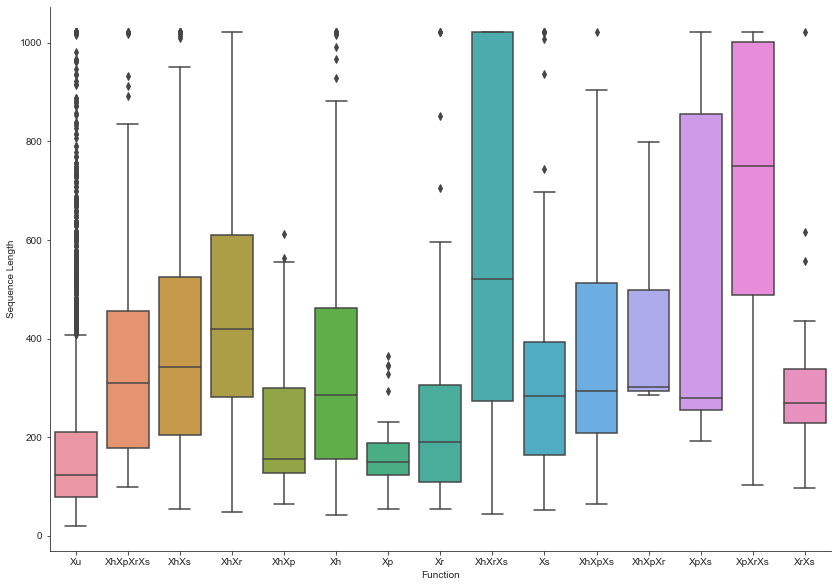

In [94]:
#boxplot describing how function/seq length relates to function

import seaborn as sns

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
sns.boxplot(y = "Length", x = "Function", data = df) 
ax.set(xlabel="Function",ylabel="Sequence Length")
sns.despine()

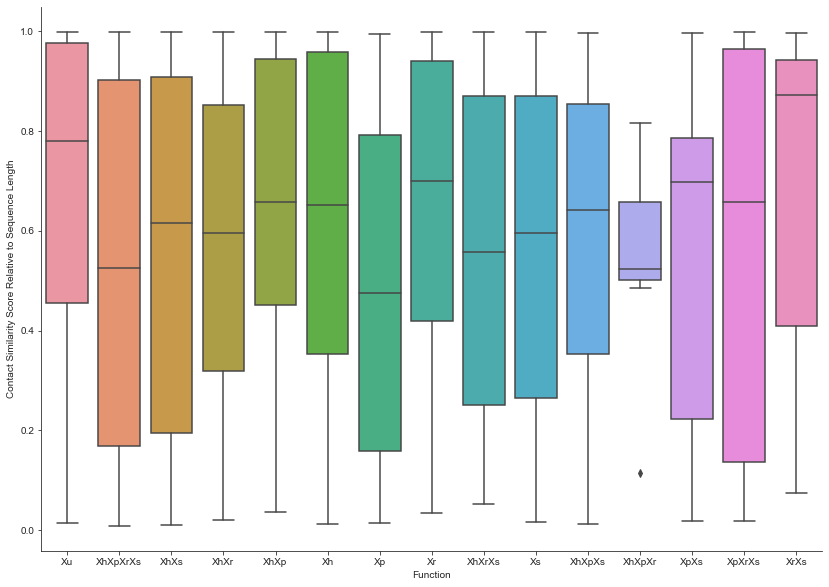

In [93]:
#boxplot describing how sequence length relates to function

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
sns.boxplot(y = "Relative Score", x = "Function", data = df)
ax.set(xlabel="Function",ylabel="Contact Similarity Score Relative to Sequence Length")
sns.despine()

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# A few helper functions:
from utils import *

# To illustrate examples
import numpy as np
from scipy.stats import mannwhitneyu, normaltest

In [59]:
funs = list(df["Function"].unique())

In [69]:
funs

['Xu',
 'XhXpXrXs',
 'XhXs',
 'XhXr',
 'XhXp',
 'Xh',
 'Xp',
 'Xr',
 'XhXrXs',
 'Xs',
 'XhXpXs',
 'XhXpXr',
 'XpXs',
 'XpXrXs',
 'XrXs']

In [98]:
Xs = df.loc[(df["Function"]=="Xs"),"Relative Score"].values
Xu = df.loc[(df["Function"]=="Xu"),"Relative Score"].values
XhXpXrXs = df.loc[(df["Function"]=="XhXpXrXs"),"Relative Score"].values
XhXs = df.loc[(df["Function"]=="XhXs"),"Relative Score"].values
XhXr = df.loc[(df["Function"]=="XhXr"),"Relative Score"].values
XhXp = df.loc[(df["Function"]=="XhXp"),"Relative Score"].values
Xp = df.loc[(df["Function"]=="Xp"),"Relative Score"].values
Xr = df.loc[(df["Function"]=="Xr"),"Relative Score"].values
Xh = df.loc[(df["Function"]=="Xh"),"Relative Score"].values

In [100]:
stat_results = [mannwhitneyu(Xs, Xu, alternative="two-sided"),
                mannwhitneyu(Xs, XhXpXrXs, alternative="two-sided"),
                mannwhitneyu(Xp, Xh, alternative="two-sided"),
                mannwhitneyu(Xs, Xr, alternative="two-sided")]

In [101]:
stat_results

[MannwhitneyuResult(statistic=242597.0, pvalue=2.4099493826949125e-05),
 MannwhitneyuResult(statistic=10179.0, pvalue=0.26420505328197064),
 MannwhitneyuResult(statistic=4659.0, pvalue=0.008994983574043432),
 MannwhitneyuResult(statistic=7277.5, pvalue=0.08517002236225892)]

In [112]:
con_df = df.replace({'Function' : { "XhXpXrXs" : "XrXs", "XhXs" : "Xs","XhXrXs":"XrXs",
                                  "XhXpXr" : "Xr","XhXpXs" : "Xs","XpXs" : "Xs","XpXrXs" : "XrXs"}})

In [167]:
con_df2 = con_df.loc[(con_df["Function"]=="Xr") | (con_df["Function"]=="Xs")|(con_df["Function"]=="XrXs")]
#con_df2 = con_df2.loc[con_df2["Function"]=="Xs"]
#con_df2 = con_df2.loc[con_df2["Function"]=="XrXr"]

In [168]:
con_df2

,VOG1,VOG2,Score,Length,Relative Score,Function
2,VOG00521,VOG00521,5.0,161.0,0.031056,XrXs
6,VOG00310,VOG00310,57.0,118.0,0.483051,Xs
13,VOG01284,VOG01284,99.0,116.0,0.853448,Xs
15,VOG01299,VOG01299,484.0,803.0,0.602740,XrXs
40,VOG00521,VOG00521,8.0,186.0,0.043011,XrXs
...,...,...,...,...,...,...
4897,VOG00885,VOG00885,31.0,364.0,0.085165,Xs
4904,VOG01986,VOG01986,19.0,1022.0,0.018591,XrXs
4913,VOG05627,VOG05627,249.0,580.0,0.429310,Xs
4936,VOG02260,VOG02260,323.0,392.0,0.823980,Xs


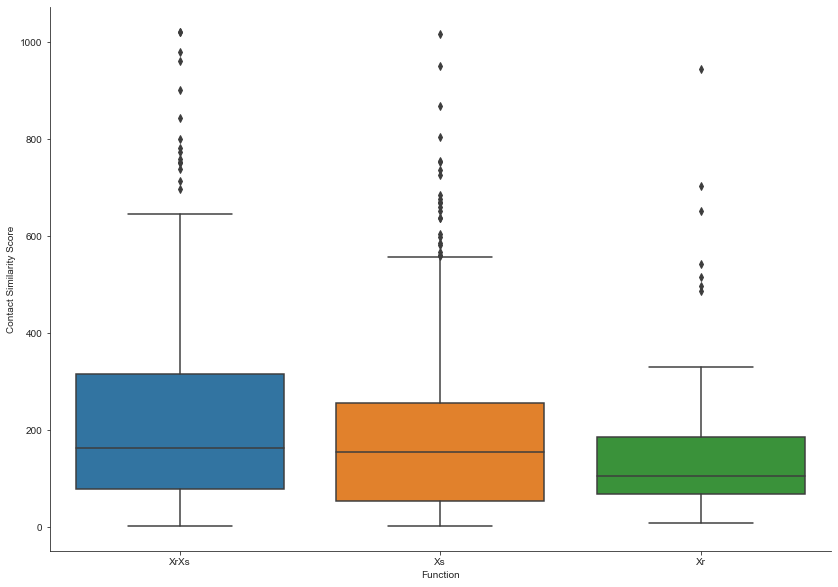

In [169]:
#boxplot describing how function relates to score

import seaborn as sns

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
sns.boxplot(y = "Score", x = "Function", data = con_df2)    
ax.set(xlabel="Function",ylabel="Contact Similarity Score")
sns.despine()

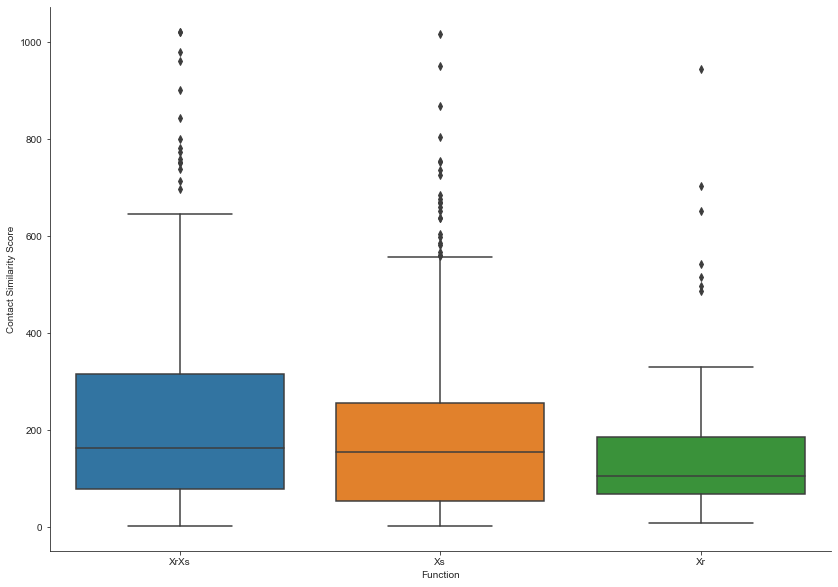

In [170]:
#boxplot describing how function relates to score

import seaborn as sns

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
sns.boxplot(y = "Score", x = "Function", data = con_df2)    
ax.set(xlabel="Function",ylabel="Contact Similarity Score")
sns.despine()

In [184]:
Xr2 = con_df2.loc[(con_df2["Function"]=="Xr"),"Relative Score"].values
Xs2 = con_df2.loc[(con_df2["Function"]=="Xs"),"Relative Score"].values
XrXs2 = con_df2.loc[(con_df2["Function"]=="XrXs"),"Relative Score"].values

In [185]:
stat_results = [mannwhitneyu(Xs2, XrXs2, alternative="two-sided"),
                mannwhitneyu(Xr2, XrXs2, alternative="two-sided"),
                mannwhitneyu(Xs2, Xr2, alternative="two-sided")]

In [186]:
stat_results

[MannwhitneyuResult(statistic=49453.0, pvalue=0.8840273132681411),
 MannwhitneyuResult(statistic=13753.0, pvalue=0.09106164238065247),
 MannwhitneyuResult(statistic=19347.0, pvalue=0.06061667149511724)]

In [187]:
xpxh_df2 = df.loc[(con_df["Function"]=="Xp") | (con_df["Function"]=="Xh")]


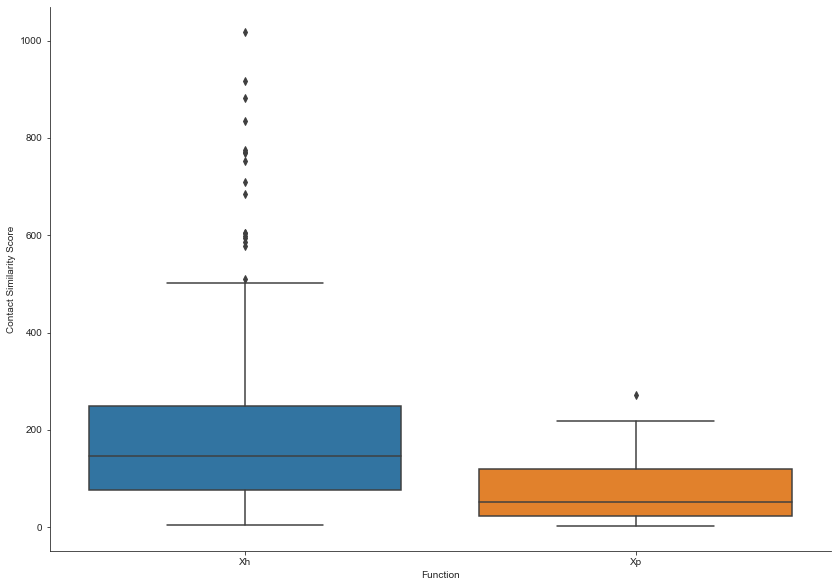

In [188]:
import seaborn as sns

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
sns.boxplot(y = "Score", x = "Function", data = xpxh_df2)    
ax.set(xlabel="Function",ylabel="Contact Similarity Score")
sns.despine()